In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

df = pd.read_csv("../data/cleaned_census_data.csv")

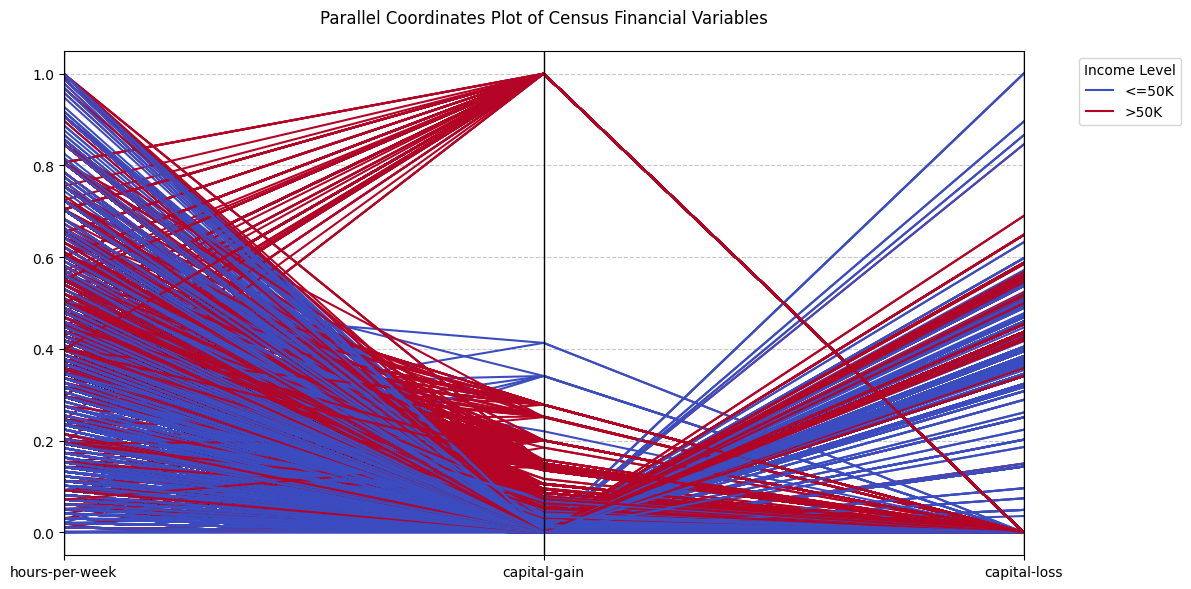


Mean Values by Income Level:
        hours-per-week  capital-gain  capital-loss
income                                            
<=50K        38.840210    148.752468     53.142921
>50K         45.473026   4006.142456    195.001530


In [2]:
columns = ["hours-per-week", "capital-gain", "capital-loss", "income"]
plot_data = df[columns].copy()

# Normalize the numerical columns to 0-1 scale for better visualization
for column in ["hours-per-week", "capital-gain", "capital-loss"]:
    plot_data[column] = (plot_data[column] - plot_data[column].min()) / (
        plot_data[column].max() - plot_data[column].min()
    )

plot_data["income_category"] = plot_data["income"]

# Create a parallel coordinates plot
plt.figure(figsize=(12, 6))
parallel_coordinates(
    plot_data.drop("income", axis=1), "income_category", colormap=plt.cm.coolwarm
)

# Customize plot
plt.title("Parallel Coordinates Plot of Census Financial Variables", pad=20)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Income Level", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Calculate mean values for each income group
means = df.groupby("income")[["hours-per-week", "capital-gain", "capital-loss"]].mean()

# Display results
plt.show()
print("\nMean Values by Income Level:")
print(means)